In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk

In [2]:
dados = pd.read_csv("Desafio -Senior Labs - 2020/sms_senior.csv",  encoding='latin1')

A primeira etapa do seu trabalho consiste em extrair estatísticas desta base de dados:
1. Exibir gráfico as palavras mais frequentes em toda a base de dados (Ex.: gráfico de barras,
nuvem de palavras, etc).
2. Exibir gráfico com as quantidades de mensagens comuns e spams para cada mês;
3. Calcular o máximo, o mínimo, a média, a mediana, o desvio padrão e a variância da quantidade
total de palavras (Word_Count) para cada mês;
4. Exibir o dia de cada mês que possui a maior sequência de mensagens comuns (não spam).

In [3]:
full_text = dados.Full_Text.str.cat(sep=' ').lower()

In [4]:
def word_count(texto):
    counts = dict()
    words = texto.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [8]:
def remove_SW(text):
    from nltk .corpus import stopwords 
    from nltk.tokenize import word_tokenize 
    
    bad_chars = [".",",",";",":","&","!","?"]
    
    for char in bad_chars:
        text = text.replace(char,"")
    
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(text) 
    filtered_tokens = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = (" ").join(filtered_tokens)

    return filtered_sentence
    
def cria_WC(texto):
    wordcloud = WordCloud().generate(texto)
    return wordcloud

In [9]:
full_text = remove_SW(full_text)


KeyboardInterrupt: 

In [ ]:
full_text

In [78]:
import operator

contagem = word_count(full_text)
contagem = sorted(contagem.items(), key = operator.itemgetter(1), reverse = True)

In [ ]:
top_words = contagem[0:10] #deixar essa parametro do slice dinamico
print(top_words)

x = [item[0] for item in top_words]
y = [item[1] for item in top_words]

plt.bar(x,y)
plt.title("top palavras")
plt.xticks(rotation  = "vertical")

sem sw


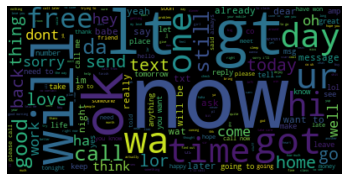

In [44]:
stopwords = ''
# stopwords = define_SW()
wordcloud = cria_WC(full_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()